In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file_path = "/Users/jochan-u/Desktop/data-science-class/titanic_train.csv"
#
# df_titanic = pd.read_csv(file_path, sep=";") # ; 로 seperate 조져줘야 #
# df_titanic

,"PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"892,3,""Kelly, Mr. James"",male,34.5,0,0,330911,..."
1,"893,3,""Wilkes, Mrs. James (Ellen Needs)"",femal..."
2,"894,2,""Myles, Mr. Thomas Francis"",male,62,0,0,..."
3,"895,3,""Wirz, Mr. Albert"",male,27,0,0,315154,8...."
4,"896,3,""Hirvonen, Mrs. Alexander (Helga E Lindq..."
...,...
413,"1305,3,""Spector, Mr. Woolf"",male,,0,0,A.5. 323..."
414,"1306,1,""Oliva y Ocana, Dona. Fermina"",female,3..."
415,"1307,3,""Saether, Mr. Simon Sivertsen"",male,38...."
416,"1308,3,""Ware, Mr. Frederick"",male,,0,0,359309,..."


In [9]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [16]:
titanic.shape

(891, 15)

In [18]:
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [17]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
titanic.drop("embark_town", axis=1, inplace=True)

KeyError: "['embark_town'] not found in axis"

In [29]:
titanic['embarked'].isna().sum()

2

In [30]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [31]:
titanic['embarked']=titanic['embarked'].fillna('S')

In [32]:
titanic['embarked'].isna().sum()

0

In [33]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [34]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic['deck'].isnull().sum()

0

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  deck        891 non-null    category
 12  alive       891 non-null    object  
 13  alone       891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [36]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic["sex"].unique()

array(['male', 'female'], dtype=object)

In [38]:
titanic['sex'].value_counts()

array(['man', 'woman', 'child'], dtype=object)

In [42]:
titanic.groupby('who')['survived'].value_counts()   # (행)[열]

who    survived
child  1            49
       0            34
man    0           449
       1            88
woman  1           205
       0            66
Name: survived, dtype: int64

In [43]:
titanic.groupby('who')['survived', "age"].mean()   # (행)[열]

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,survived,age
who,,
child,0.590361,6.369518
man,0.163873,31.978585
woman,0.756458,31.217712


Text(0, 0.5, '')

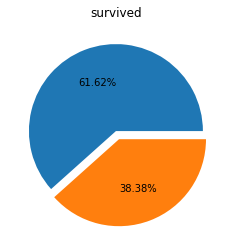

In [44]:
plt.pie(titanic['survived'].value_counts(), explode=[0,0.1], autopct='%1.2f%%')
#titanic['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.title('survived')
plt.ylabel('')

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'survived')

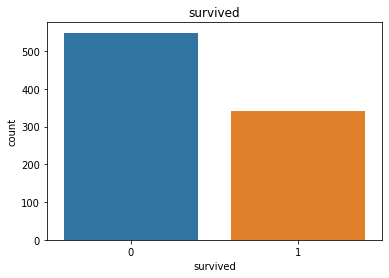

In [45]:
sns.countplot('survived', data=titanic)
plt.title('survived')

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'survived')

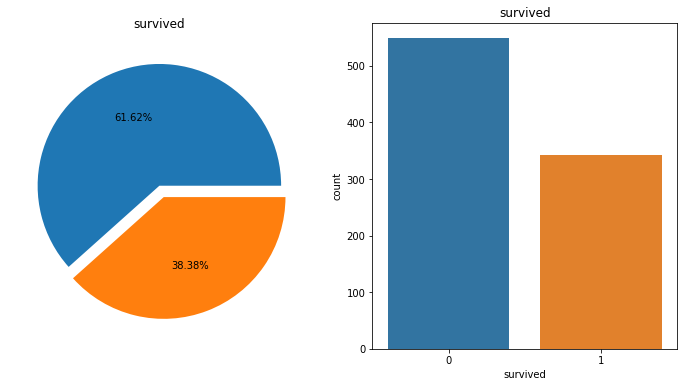

In [46]:
f,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].pie(titanic['survived'].value_counts(), explode=[0,0.1], autopct='%1.2f%%')
ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('survived')

Text(0.5, 1.0, 'age')

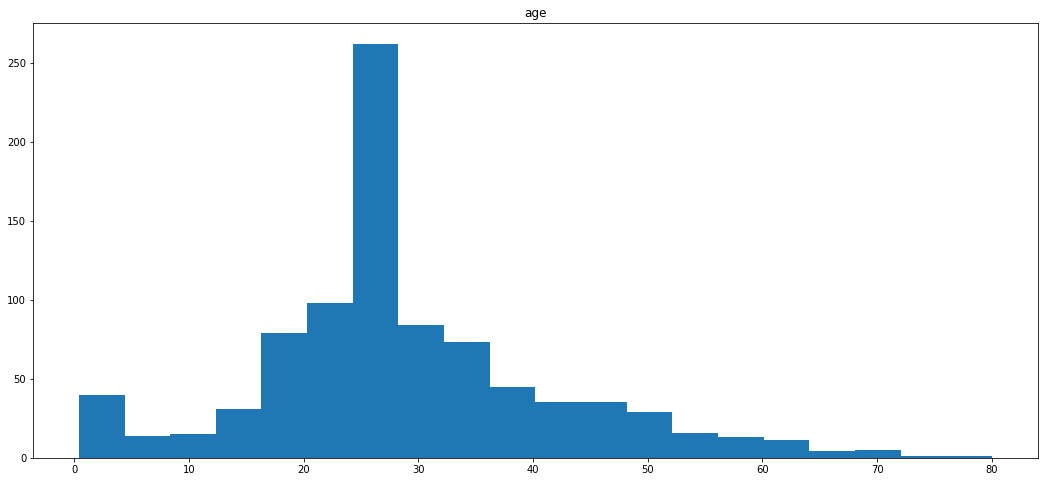

In [47]:
titanic['age'].hist(bins=20,figsize=(18,8),grid=False);
plt.title('age')

In [48]:
titanic.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'pclass vs survived')

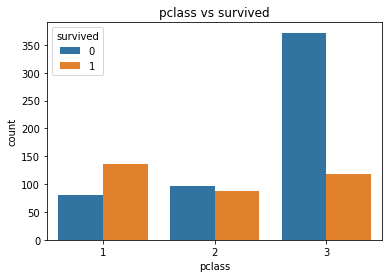

In [49]:
sns.countplot('pclass', hue = 'survived', data=titanic)
plt.title('pclass vs survived')

In [50]:
titanic.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex vs. Survived')

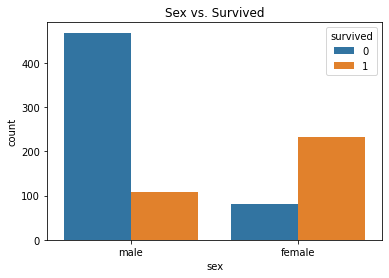

In [51]:
sns.countplot('sex', hue = 'survived', data=titanic)
plt.title('Sex vs. Survived')

/Users/jochan-u/opt/anaconda3/envs/class/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'age vs. survived')

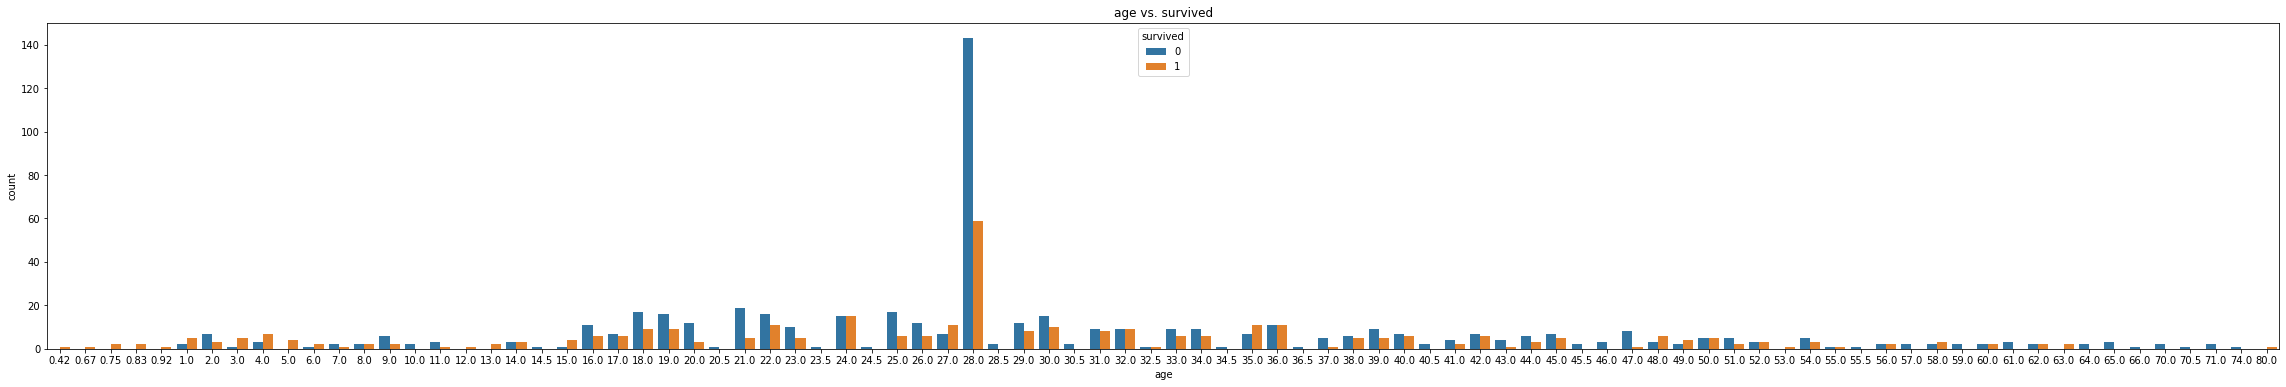

In [52]:
plt.figure(figsize=(40,6))
sns.countplot('age', hue = 'survived', data=titanic)
plt.title('age vs. survived')

In [53]:
titanic.corr() # 중요

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [54]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [58]:
titanic['sex']=titanic['sex'].replace('female', 0)  # replace로 데이터 타입 변경 해줘야됨 ㅇㅇ
titanic['sex']=titanic['sex'].replace('male', 1)

In [59]:
titanic['who']=titanic['who'].replace('woman', 0)
titanic['who']=titanic['who'].replace('man', 1)
titanic['who']=titanic['who'].replace('child', 2)
titanic['who']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: who, Length: 891, dtype: int64

Text(0.5, 1.0, 'Correlation between features')

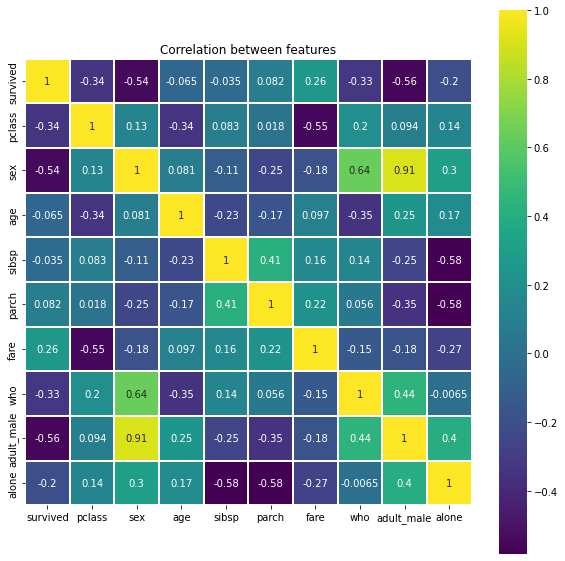

In [60]:
plt.figure(figsize=(10, 10))
sns.heatmap(titanic.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')